In [1]:
from glob import glob
from natsort import natsorted
import matplotlib.image as mpimg
from module_face_mask.read_annotation import get_annotation
from module_face_mask.preprocess import DATASET
from module_face_mask.utility import do_plot

from torch.utils.data import Dataset
import albumentations as A
import albumentations.pytorch

### Load Data

In [2]:
# https://www.kaggle.com/andrewmvd/face-mask-detection
image_files = natsorted(glob('data/face_mask/images/*.png'))
annot_files = natsorted(glob('data/face_mask/annotations/*.xml'))

### EDA

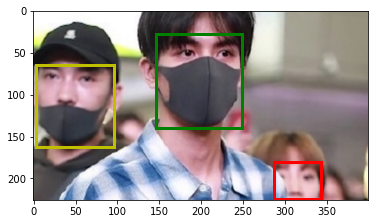

In [3]:
index = 0
image = mpimg.imread(image_files[index])    
annotation = get_annotation(annot_files[index])
do_plot(image, annotation)

### Transform

In [4]:
transform = A.Compose([
    A.Resize(300, 300), 
    A.RandomCrop(224, 224),
    A.OneOf([
        A.HorizontalFlip(p=1),
        A.VerticalFlip(p=1),
        A.Rotate(p=1),
    ], p=1),
    A.OneOf([
        A.MotionBlur(p=1),
        A.GaussNoise(p=1)    
    ], p=1),
    albumentations.pytorch.transforms.ToTensor()
],
    bbox_params = A.BboxParams(format='pascal_voc', label_fields=['labels'])
)

dataset = DATASET(image_files, annot_files, transform=transform)

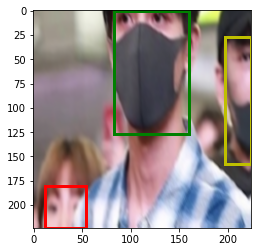

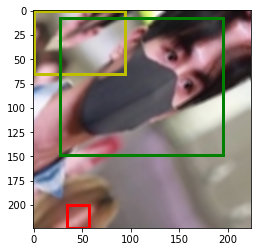

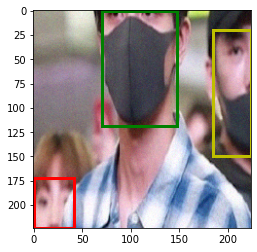

In [5]:
for _ in range(3):
    image, annotation = dataset[0]
    do_plot(image.permute(1, 2, 0), annotation)